In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import norm, uniform, ks_1samp, levene
from scipy.stats import ttest_ind, f_oneway

Файлы с данными лежат в папке по ссылке: https://drive.google.com/drive/folders/1N7M_yhakFID7gfPpBNmxPe1n1Aiy1rg2?usp=sharing

## Проверка нормальности
### Задание 1
Сгенерируйте два набора данных по 40 наблюдений:
- Первый набор из нормального распределения N(2, 3)
- Второй набор из равномерного распределения U(0, 10)

С помощью функции `shapiro` библиотеки `scipy` выполните проверку нормальности для каждого набора данных. Проинтерпретируйте полученные результаты.

In [140]:
np.random.seed(42)
normal_data = np.random.normal(loc=2, scale=np.sqrt(3), size=40)
uniform_data = np.random.uniform(low=0, high=10, size=40)

shapiro_normal = shapiro(normal_data)
shapiro_uniform = shapiro(uniform_data)
print(f"Нормальное распределение: статистика = {shapiro_normal.statistic:.4f}, p-value = {shapiro_normal.pvalue:.4f}")
print(f"Равномерное распределение: статистика = {shapiro_uniform.statistic:.4f}, p-value = {shapiro_uniform.pvalue:.4f}")

if shapiro_normal.pvalue > 0.05:
    print("Данные из нормального распределения НЕ противоречат гипотезе нормальности.")
else:
    print("Данные из нормального распределения НЕ являются нормальными.")

if shapiro_uniform.pvalue > 0.05:
    print("Данные из равномерного распределения выглядят как нормальные.")
else:
    print("Данные из равномерного распределения НЕ являются нормальными.")


Нормальное распределение: статистика = 0.9792, p-value = 0.6604
Равномерное распределение: статистика = 0.9193, p-value = 0.0073
Данные из нормального распределения НЕ противоречат гипотезе нормальности.
Данные из равномерного распределения НЕ являются нормальными.


### Задание 2

Загрузите данные из файла `Предел текучести.xlsx`. Файл содержит замеры предела текучести для стали марки 09ГСФ при низком и высоком содержании ванадия.

Можно ли считать данные в каждом из двух наборов нормально распределёнными?  


In [141]:
f = open("Предел текучести.csv")
s = f.readline()

v_low = []
v_high = []

for i in f:
  j = i.replace(',', '.')
  j = j.split(';')
  j = list(map(float, j))
  v_low.append(j[0])
  v_high.append(j[1])


stat_low, p_value_low = shapiro(v_low)
stat_high, p_value_high = shapiro(v_high)


print(f"Статистика теста: {stat_low}, p-value: {p_value_low}")
if p_value_low > 0.05:
    print("Данные с низким содержанием ванадия НЕ противоречат гипотезе нормальности.")
else:
    print("Данные с низким содержанием ванадия НЕ являются нормальными.")

print('\n')
print(f"Статистика теста: {stat_high}, p-value: {p_value_high}")
if p_value_high > 0.05:
    print("Данные с высоким содержанием ванадия НЕ противоречат гипотезе нормальности.")
else:
    print("Данные с высоким содержанием ванадия НЕ являются нормальными.")

Статистика теста: 0.9885633669262366, p-value: 0.9070115996543543
Данные с низким содержанием ванадия НЕ противоречат гипотезе нормальности.


Статистика теста: 0.9647343609263991, p-value: 0.1403040598401531
Данные с высоким содержанием ванадия НЕ противоречат гипотезе нормальности.


In [ ]:
# YOUR CODE HERE


## Подгонка распределений
### Задание 3

С помощью классов `norm` и `uniform` из `scipy.stats` осуществите подгонку двух этих распределений под данные с высоким содержанием ванадия. С помощью `ks_1samp` проведите тест Колмогорова-Смирнова для оценки точности подгонки. Какое из распределений удалось подогнать лучше?

Параметры нормального распределения: mu=454.63, sigma=15.36483322395658
Параметры равномерного распределения: a=424.0, b=70.0
Тест Колмогорова-Смирнова для нормального распределения: Статистика=0.12297458336139966, p-value=0.40348287489497103
Тест Колмогорова-Смирнова для равномерного распределения: Статистика=0.2242857142857143, p-value=0.010849882615900253
Данные могут быть из нормального распределения.
Данные НЕ могут быть из равномерного распределения.


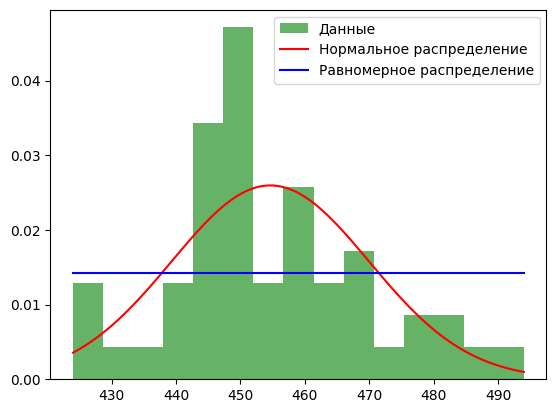

In [142]:
data_high_vanadium = v_high
params_norm = norm.fit(data_high_vanadium)
print(f"Параметры нормального распределения: mu={params_norm[0]}, sigma={params_norm[1]}")

params_uniform = uniform.fit(data_high_vanadium)
print(f"Параметры равномерного распределения: a={params_uniform[0]}, b={params_uniform[1]}")

ks_stat_norm, p_value_norm = ks_1samp(data_high_vanadium, norm.cdf, args=params_norm)
print(f"Тест Колмогорова-Смирнова для нормального распределения: Статистика={ks_stat_norm}, p-value={p_value_norm}")

ks_stat_uniform, p_value_uniform = ks_1samp(data_high_vanadium, uniform.cdf, args=params_uniform)
print(f"Тест Колмогорова-Смирнова для равномерного распределения: Статистика={ks_stat_uniform}, p-value={p_value_uniform}")

if p_value_norm > 0.05:
    print("Данные могут быть из нормального распределения.")
else:
    print("Данные НЕ могут быть из нормального распределения.")

if p_value_uniform > 0.05:
    print("Данные могут быть из равномерного распределения.")
else:
    print("Данные НЕ могут быть из равномерного распределения.")

x = np.linspace(min(data_high_vanadium), max(data_high_vanadium), 100)
pdf_norm = norm.pdf(x, *params_norm)
pdf_uniform = uniform.pdf(x, *params_uniform)

plt.hist(data_high_vanadium, bins=15, density=True, alpha=0.6, color='g', label='Данные')
plt.plot(x, pdf_norm, 'r-', label='Нормальное распределение')
plt.plot(x, pdf_uniform, 'b-', label='Равномерное распределение')
plt.legend()
plt.show()

## Т-критерий
### Задание 4
Для данных, рассмотренных на лекции, вычислите средние значения и оцените значимость различия между средними. Используйте `ttest_ind` из `scipy`.

In [144]:
example1 = pd.DataFrame({'Группа 1': [2, 3, 1],
                         'Группа 2': [6, 7, 5]})

mean_group1 = example1['Группа 1'].mean()
mean_group2 = example1['Группа 2'].mean()

print(f"Среднее значение для Группы 1: {mean_group1}")
print(f"Среднее значение для Группы 2: {mean_group2}")


t_stat, p_value = ttest_ind(example1['Группа 1'], example1['Группа 2'])

print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")


if p_value < 0.05:
    print("Различие между группами статистически значимо (p-value < 0.05).")
else:
    print("Различие между группами НЕ статистически значимо (p-value >= 0.05).")

Среднее значение для Группы 1: 2.0
Среднее значение для Группы 2: 6.0
t-статистика: -4.898979485566356
p-значение: 0.00804989310083772
Различие между группами статистически значимо (p-value < 0.05).


In [ ]:
### YOUR CODE HERE


Т-критерий Стьюдента помимо нормальности данных требует равенство дисперсий в группах. С помощью функции `levene` библиотеки `scipy` осуществите тест Левена для проверки равенства дисперсий для данных из задания 2 (прочность при разном содержании ванадия). Можно ли для них использовать Т-критерий Стьюдента?

Оцените значимость различия между средними. Можно ли считать, что добавка ванадия повышает прочность стали?

In [145]:
stat_levene, p_value_levene = levene(v_low, v_high)
print(f"Статистика теста Левена: {stat_levene}")
print(f"p-значение теста Левена: {p_value_levene}")

if p_value_levene > 0.05:
    print("Дисперсии одинаковы, можно использовать Т-критерий Стьюдента.")
else:
    print("Дисперсии разные, Т-критерий Стьюдента нельзя использовать.")

t_stat, p_value_ttest = ttest_ind(v_low, v_high)

print(f"t-статистика: {t_stat}")
print(f"p-значение для Т-критерия Стьюдента: {p_value_ttest}")

if p_value_ttest < 0.05:
    print("Различие между группами статистически значимо (p-value < 0.05).")
else:
    print("Различие между группами не статистически значимо (p-value >= 0.05).")
if p_value_ttest < 0.05:
    print("Добавка ванадия статистически значимо влияет на прочность стали.")
else:
    print("Добавка ванадия не влияет на прочность стали на статистически значимом уровне.")


Статистика теста Левена: 0.1216652615865412
p-значение теста Левена: 0.7279836307088485
Дисперсии одинаковы, можно использовать Т-критерий Стьюдента.
t-статистика: -2.2652770285980943
p-значение для Т-критерия Стьюдента: 0.025696870047471156
Различие между группами статистически значимо (p-value < 0.05).
Добавка ванадия статистически значимо влияет на прочность стали.


In [ ]:
### YOUR CODE HERE


## Дисперсионный анализ


In [146]:
example2 = pd.DataFrame({'Группа': [1, 1, 1, 2, 2, 2],
                         'Значение': [2, 3, 1, 6, 7, 5]})

group1 = example2[example2['Группа'] == 1]['Значение']
group2 = example2[example2['Группа'] == 2]['Значение']

f_stat, p_value = f_oneway(group1, group2)

print(f"F-статистика: {f_stat}")
print(f"p-значение: {p_value}", '\n')

if p_value < 0.05:
    print("Различие между группами статистически значимо.")
else:
    print("Различие между группами не статистически значимо.")


F-статистика: 24.0
p-значение: 0.008049893100837719 

Различие между группами статистически значимо.


### Задание 5
Библиотечная функция для дисперсионного анализа требует задать зависимую переменную и фактор в виде формулы типа `str`: `'Зависимая ~ C(Фактор)'`, где вместо слов "Зависимая" и "Фактор" должны стоять имена столбцов. Напишите функцию, которая будет формировать такую формулу.

In [147]:
def anova_formula(dependent: str, factor: str) -> str:
    return f"{dependent} ~ C({factor})"

formula = anova_formula('Значение', 'Группа')
print(formula)


Значение ~ C(Группа)


Выполните код из следующих ячеек и проанализируйте результат.

In [148]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova(df: pd.DataFrame,
          dependent: str,
          factor: str):

    formula = anova_formula(dependent, factor)
    model = ols(formula, data=df).fit()
    res = sm.stats.anova_lm(model, typ=2)

    return res

In [149]:
anova(example2, 'Значение', 'Группа')

,sum_sq,df,F,PR(>F)
C(Группа),24.0,1.0,24.0,0.00805
Residual,4.0,4.0,NaN,NaN


F-статистика для фактора "Группа" составляет 24.0, что указывает на значительное объяснение вариации в данных этим фактором.

p-значение для теста равно 0.00805, что меньше уровня значимости 0.05. Это означает, что различия между группами статистически значимы.

Сумма квадратов для фактора "Группа" составляет 24.0, что подтверждает наличие значимой вариации между группами. Остаточная сумма квадратов — 4.0.

### Задание 6
Загрузите файл `Марки стали.xlsx` он содержит данные о прочности стали трёх марок. Выясните, есть ли значимое различие в прочности?

In [150]:
df = pd.read_excel("Марки стали.xlsx")

print(df['Марка'].unique())
df['Марка'] = df['Марка'].astype('category')

anova_result = anova(df, 'Предел_текучести', 'Марка')
print(anova_result, '\n')


if anova_result["PR(>F)"].iloc[0] < 0.05:
    print("Существует статистически значимое различие в прочности между марками стали.")
else:
    print("Различия в прочности между марками стали статистически незначимы.")

['СТ3СП' '09ГСФ' 'С345']
                sum_sq    df           F        PR(>F)
C(Марка)  93957.266667   2.0  402.661217  7.933671e-21
Residual   3150.100000  27.0         NaN           NaN 

Существует статистически значимое различие в прочности между марками стали.


In [95]:
# YOUR CODE HERE


Данные удобно отображать на графике средних с ошибками.

In [151]:
def means_plot(df, value_var, group_var):
    grouped = df.groupby(by=group_var, observed=False)
    means = grouped.mean()
    sigmas = grouped.std()

    plt.errorbar(means.index.astype(str), means[value_var],
                 yerr=sigmas[value_var],
                 fmt='-o',
                 capsize=3)
    plt.xlabel(group_var)
    plt.ylabel(value_var)
    plt.show()

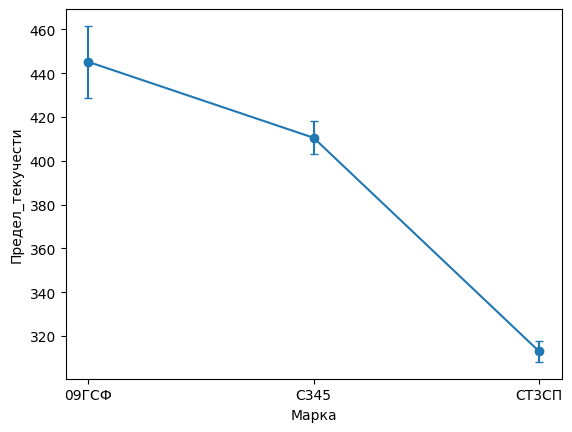

In [152]:
means_plot(df, 'Предел_текучести', 'Марка')

### Задание 7
Чтобы провести многофакторный дисперсионный анализ, нужно добавить в формулу все факторы, а также желаемые взаимодействия.
`Зависимая ~ C(A) + C(B) + C(A):C(B)`

Мы будем рассматривать два фактора, поэтому достаточно доработать функцию для формулы так, чтобы она добавляла их и их взаимодействие. Однако, вы можете реализовать функцию для общего случая, где в формуле может быть произвольное число факторов и всевозможные взаимодействия пар, троек и т.д.

Напишите функции для формулы и для дисперсионного анализа. Проведите анализ для приведённых примеров.

In [ ]:
# YOUR CODE HERE


In [153]:
def anova_formula(dependent: str, factors: list) -> str:
    formula = dependent + " ~ " + " + ".join([f"C({factor})" for factor in factors])
    if len(factors) == 2:
        formula += " + C(" + factors[0] + ")*C(" + factors[1] + ")"

    return formula

def anova(df: pd.DataFrame, dependent: str, factors: list):
    formula = anova_formula(dependent, factors)
    model = ols(formula, data=df).fit()
    res = sm.stats.anova_lm(model, typ=2)
    return res


example3 = pd.DataFrame({'Пол': ['м'] * 6 + ['ж'] * 6,
                         'Группа': [1, 1, 1, 2, 2, 2] * 2,
                         'Значение': [2, 3, 1, 6, 7, 5, 4, 5, 3, 8, 9, 7]})
anova_result = anova(example3, 'Значение', ['Пол', 'Группа'])

print(anova_result)

if anova_result["PR(>F)"].iloc[0] < 0.05:
    print("Существует статистически значимое различие по фактору Пол.")
if anova_result["PR(>F)"].iloc[1] < 0.05:
    print("Существует статистически значимое различие по фактору Группа.")
if anova_result["PR(>F)"].iloc[2] < 0.05:
    print("Существует статистически значимое взаимодействие между Полом и Группой.")

                        sum_sq   df             F    PR(>F)
C(Пол)            1.200000e+01  1.0  1.200000e+01  0.008516
C(Группа)         4.800000e+01  1.0  4.800000e+01  0.000121
C(Пол):C(Группа)  5.339602e-29  1.0  5.339602e-29  1.000000
Residual          8.000000e+00  8.0           NaN       NaN
Существует статистически значимое различие по фактору Пол.
Существует статистически значимое различие по фактору Группа.


In [ ]:
# YOUR CODE HERE

In [154]:
example4 = pd.DataFrame({'Пол': ['м'] * 6 + ['ж'] * 6,
                         'Группа': [1, 1, 1, 2, 2, 2] * 2,
                         'Значение': [10, 12, 8, 5, 7, 3, 5, 7, 3, 10, 12, 8]})
anova_result = anova(example3, 'Значение', ['Пол', 'Группа'])
print(anova_result)

if anova_result["PR(>F)"].iloc[0] < 0.05:
    print("Существует статистически значимое различие по фактору Пол.")
if anova_result["PR(>F)"].iloc[1] < 0.05:
    print("Существует статистически значимое различие по фактору Группа.")
if anova_result["PR(>F)"].iloc[2] < 0.05:
    print("Существует статистически значимое взаимодействие между Полом и Группой.")

                        sum_sq   df             F    PR(>F)
C(Пол)            1.200000e+01  1.0  1.200000e+01  0.008516
C(Группа)         4.800000e+01  1.0  4.800000e+01  0.000121
C(Пол):C(Группа)  5.339602e-29  1.0  5.339602e-29  1.000000
Residual          8.000000e+00  8.0           NaN       NaN
Существует статистически значимое различие по фактору Пол.
Существует статистически значимое различие по фактору Группа.


In [ ]:
# YOUR CODE HERE

### Задание 8
Загрузите файл `Электропроводность.xlsx`. Изучите зависимость электропроводности алюминия от его чистоты и температуры окружающей среды.

In [155]:
f = open("Электропроводность.csv", encoding='windows-1251')
s = f.readline()
s = s.split(';')
a = [[] for i in range(3)]
s[2] = s[2][:-1]
for i in f:
    j = i
    j = j.replace(',', '.')
    j = j.split(';')
    a[0].append(int(j[0]))
    a[1].append(j[1])
    a[2].append(float(j[2]))

data = {
    s[0]: a[0],
    s[1]: a[1],
    s[2]: a[2]
}
df = pd.DataFrame(data)
df['Чистота_алюминия'] = df['Чистота_алюминия'].map({'высокая': 1, 'низкая': 0})

model = ols('Электропроводность ~ Температура + Чистота_алюминия + Температура:Чистота_алюминия', data=df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

if anova_result["PR(>F)"].iloc[0] < 0.05:
    print("Существует статистически значимое различие по фактору Температура.")
else:
    print("Различий по фактору Температура нет.")

if anova_result["PR(>F)"].iloc[1] < 0.05:
    print("Существует статистически значимое различие по фактору Чистота алюминия.")
else:
    print("Различий по фактору Чистота алюминия нет.")

if anova_result["PR(>F)"].iloc[2] < 0.05:
    print("Существует статистически значимое взаимодействие между температурой и чистотой алюминия.")
else:
    print("Взаимодействия между температурой и чистотой алюминия статистически незначимы.")


                                sum_sq    df           F        PR(>F)
Температура                   1.404500   1.0  181.076033  3.178171e-13
Чистота_алюминия              0.341333   1.0   44.006612  4.899819e-07
Температура:Чистота_алюминия  0.004500   1.0    0.580165  4.531017e-01
Residual                      0.201667  26.0         NaN           NaN
Существует статистически значимое различие по фактору Температура.
Существует статистически значимое различие по фактору Чистота алюминия.
Взаимодействия между температурой и чистотой алюминия статистически незначимы.


In [ ]:
# YOUR CODE HERE
